In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly_express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [115]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [116]:
df_merged = pd.read_csv('D:\\Projo\\Projet-Data-IA\\Merged_all_tables\\merged_final.csv', sep=',')

In [117]:
# def clean_actors_list(actors_list):
#     # Convertir la liste en un ensemble pour supprimer les doublons, puis trier
#     unique_actors = sorted(set(actors_list))
#     # Convertir l'ensemble trié en une chaîne de caractères séparée par des virgules
#     cleaned_list = ', '.join(unique_actors)
#     return cleaned_list

# # Appliquer la fonction à chaque élément de la colonne "Actors_Actresses"
# df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].apply(eval).apply(clean_actors_list)
# df_merged['production_companies_name'] = df_merged['production_companies_name'].apply(eval).apply(clean_actors_list)

# Suppression des colonnes inutiles pour l'analyse
df_merged.drop(columns=['overview', 'poster_path', 'backdrop_path', 'nconst_director'], inplace=True)
df_merged.dropna(inplace=True)

df_merged.head(10)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,popularity,production_companies_name,Director_name,Actors_Actresses
0,tt0035423,Kate et Léopold,6.4,88939.0,2001.0,118.0,Comedy,Fantasy,15.770,"Miramax, Konrad Pictures",James Mangold,"Bradley Whitford, Paxton Whitehead, Matthew Su..."
1,tt0054632,L'année dernière à Marienbad,7.7,24793.0,1961.0,94.0,Drama,Mystery,11.284,"Argos Films, Cineriz, Silver Films, Terra Film...",Alain Resnais,"Pierre Barbaud, Delphine Seyrig, Françoise Ber..."
2,tt0054692,Sous le ciel bleu d'Hawaï,6.1,7478.0,1961.0,102.0,Comedy,Musical,10.444,"Hal Wallis Productions, Paramount",Norman Taurog,"Howard McNear, Joan Blackman, Elvis Presley, A..."
3,tt0054698,Diamants sur canapé,7.6,191686.0,1961.0,115.0,Comedy,Drama,18.252,"Jurow-Shepherd, Paramount",Blake Edwards,"José Luis de Vilallonga, Dorothy Whitney, Mart..."
4,tt0054847,Le Cid,7.2,15632.0,1961.0,182.0,Biography,Drama,13.196,"Samuel Bronston Productions, Allied Artists Pi...",Anthony Mann,"Frank Thring, Michael Hordern, Gary Raymond, G..."
5,tt0054953,Les Canons de Navarone,7.5,55225.0,1961.0,158.0,Action,Adventure,15.708,"Columbia Pictures, Highroad Productions",J. Lee Thompson,"David Niven, Anthony Quinn, Stanley Baker, Ant..."
6,tt0054997,L'Arnaqueur,8.0,86655.0,1961.0,134.0,Drama,Sport,12.066,"Rossen Films, 20th Century Fox",Robert Rossen,"Jackie Gleason, Michael Constantine, Paul Newm..."
7,tt0055031,Jugement à Nuremberg,8.3,85083.0,1961.0,179.0,Drama,War,13.877,"United Artists, Roxlom Films",Stanley Kramer,"Maximilian Schell, Montgomery Clift, Spencer T..."
8,tt0055047,Le roi des rois,7.0,8974.0,1961.0,168.0,Biography,Drama,12.283,"Samuel Bronston Productions, Metro-Goldwyn-Mayer",Nicholas Ray,"Siobhan McKenna, Viveca Lindfors, Hurd Hatfiel..."
9,tt0055184,Les désaxés,7.2,23321.0,1961.0,125.0,Drama,Romance,13.136,"Metro-Goldwyn-Mayer, United Artists, Seven Art...",John Huston,"Eli Wallach, Montgomery Clift, Rex Bell, Kevin..."


In [118]:
df_merged['genre1'].value_counts()

genre1
Action         1450
Drama          1130
Comedy         1027
Crime           441
Biography       417
Adventure       400
Horror          179
Animation        37
Mystery          20
Fantasy          19
Thriller          7
Documentary       7
Western           4
Family            3
Sci-Fi            2
Romance           1
Music             1
History           1
Name: count, dtype: int64

In [119]:
df_merged.dtypes


titleId                       object
title                         object
averageRating                float64
numVotes                     float64
startYear                    float64
runtimeMinutes               float64
genre1                        object
genre2                        object
popularity                   float64
production_companies_name     object
Director_name                 object
Actors_Actresses              object
dtype: object

In [120]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes,popularity
count,5146.000000,5.146000e+03,5146.000000,5146.000000,5146.000000
mean,6.911757,1.352459e+05,2004.119705,114.215896,28.589045
std,0.601120,2.188546e+05,15.000591,19.565688,121.237880
min,6.000000,5.026000e+03,1961.000000,85.000000,10.000000
25%,6.400000,2.272500e+04,1995.000000,100.000000,12.165750
50%,6.800000,5.994200e+04,2008.000000,111.000000,15.754500
75%,7.300000,1.537830e+05,2016.000000,124.000000,24.043000
max,9.300000,2.878611e+06,2024.000000,238.000000,5089.969000


In [121]:
# Les 20 films les mieux notés de 1980 à 2024

df_sorted_avg =  df_merged.sort_values(by='averageRating', ascending=False)
df_sorted_avg.head()

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,popularity,production_companies_name,Director_name,Actors_Actresses
1225,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,Drama,84.139,Castle Rock Entertainment,Frank Darabont,"Mark Rolston, James Whitmore, Larry Brandenbur..."
233,tt0068646,Le Parrain,9.2,2004826.0,1972.0,175.0,Crime,Drama,113.216,"Alfran Productions, Paramount",Francis Ford Coppola,"Robert Duvall, Richard Conte, Al Pacino, James..."
2475,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Action,Crime,81.582,"DC Comics, Isobel Griffiths, Syncopy, Warner B...",Christopher Nolan,"Cillian Murphy, Morgan Freeman, Gary Oldman, M..."
1667,tt0167260,Le Seigneur des anneaux : Le Retour du roi,9.0,1972573.0,2003.0,201.0,Action,Adventure,65.571,"New Line Cinema, WingNut Films, The Saul Zaent...",Peter Jackson,"Ian McKellen, Sean Astin, Ali Astin, Elijah Wo..."
284,tt0071562,"Le Parrain, 2ᵉ partie",9.0,1359986.0,1974.0,202.0,Crime,Drama,55.942,"The Coppola Company, Paramount",Francis Ford Coppola,"Robert Duvall, Talia Shire, Michael V. Gazzo, ..."


In [183]:
# Moyenne durée des 20 films les mieux notés
df_mean_avg = df_sorted_avg['runtimeMinutes'].head(20).mean()
df_mean_avg = df_mean_avg.round()
df_mean_avg

161.0

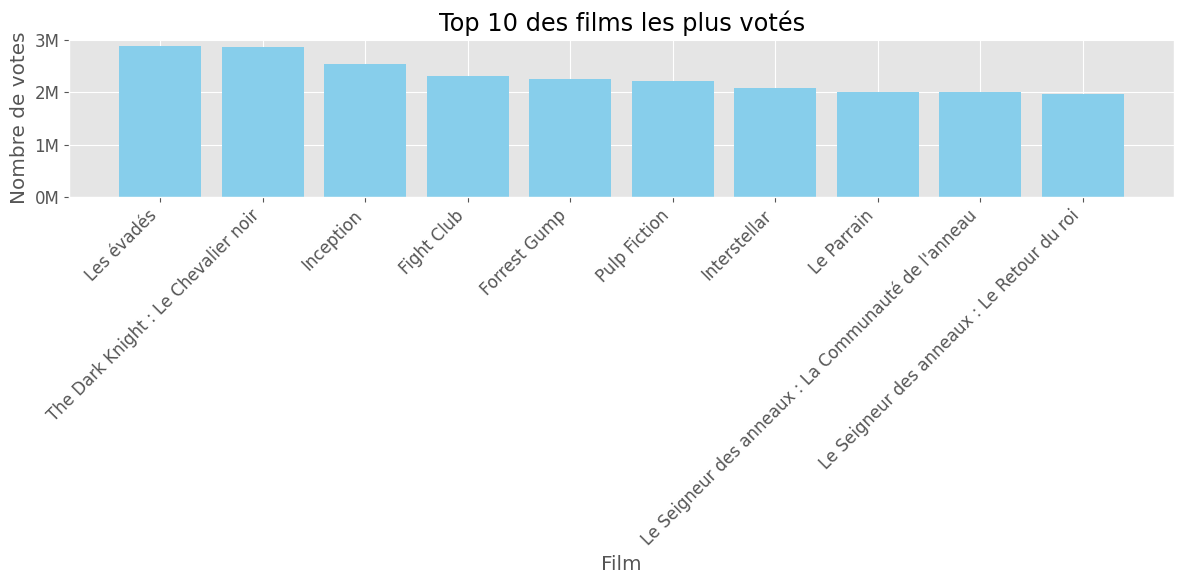

In [200]:
# Top 10 des films les plus votés
df_sorted_numVotes = df_merged.sort_values(by='numVotes', ascending=False).head(10)

# Fonction de formatage des ticks
def thousands_formatter(x, pos):
    return f'{int(x/1000000)}M'

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(df_sorted_numVotes['title'], df_sorted_numVotes['numVotes'], color='skyblue')
plt.xlabel('Film')
plt.ylabel('Nombre de votes')
plt.title('Top 10 des films les plus votés')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()

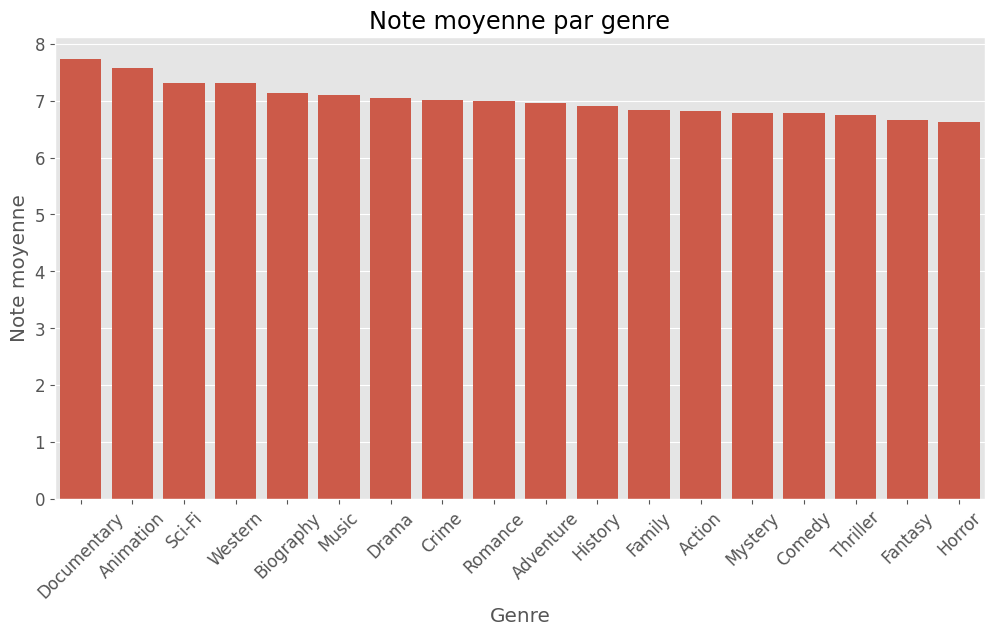

In [174]:
# 1. Note moyenne par genre
avg_rating_by_genre = df_merged.groupby('genre1')['averageRating'].mean().reset_index()
avg_rating_by_genre = avg_rating_by_genre.sort_values(by='averageRating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='genre1', y='averageRating', data=avg_rating_by_genre)
plt.title('Note moyenne par genre')
plt.xlabel('Genre')
plt.ylabel('Note moyenne')
plt.xticks(rotation=45)
plt.show()

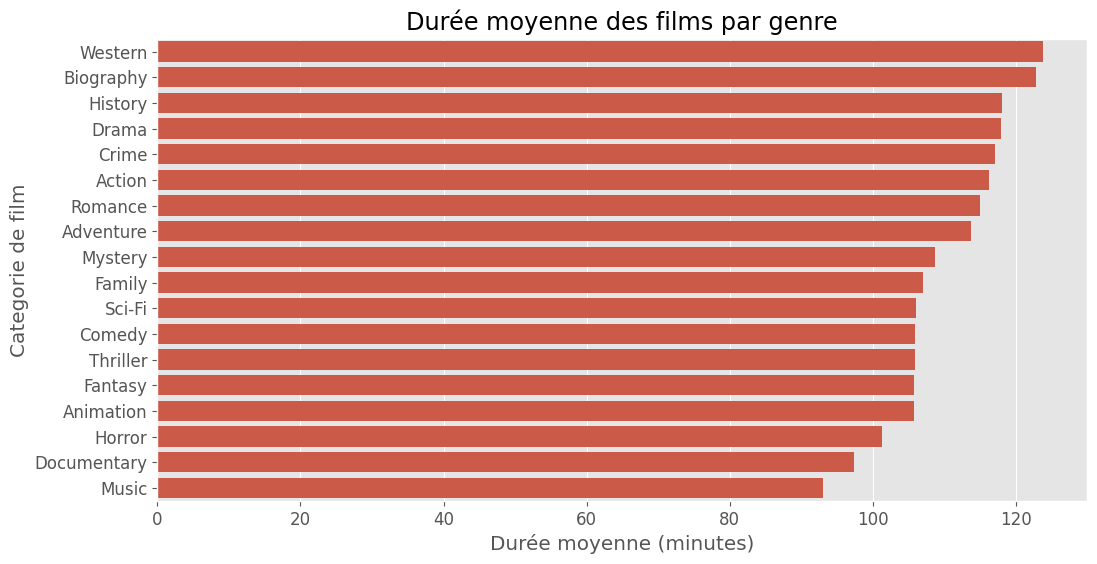

In [177]:
# 3. Temps de visionnage moyen par production
runtime_by_production = df_merged.groupby('genre1')['runtimeMinutes'].mean().reset_index()
runtime_by_production = runtime_by_production.sort_values(by='runtimeMinutes', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='runtimeMinutes', y='genre1', data=runtime_by_production)
plt.title('Durée moyenne des films par genre')
plt.xlabel('Durée moyenne (minutes)')
plt.ylabel('Categorie de film')
plt.show()

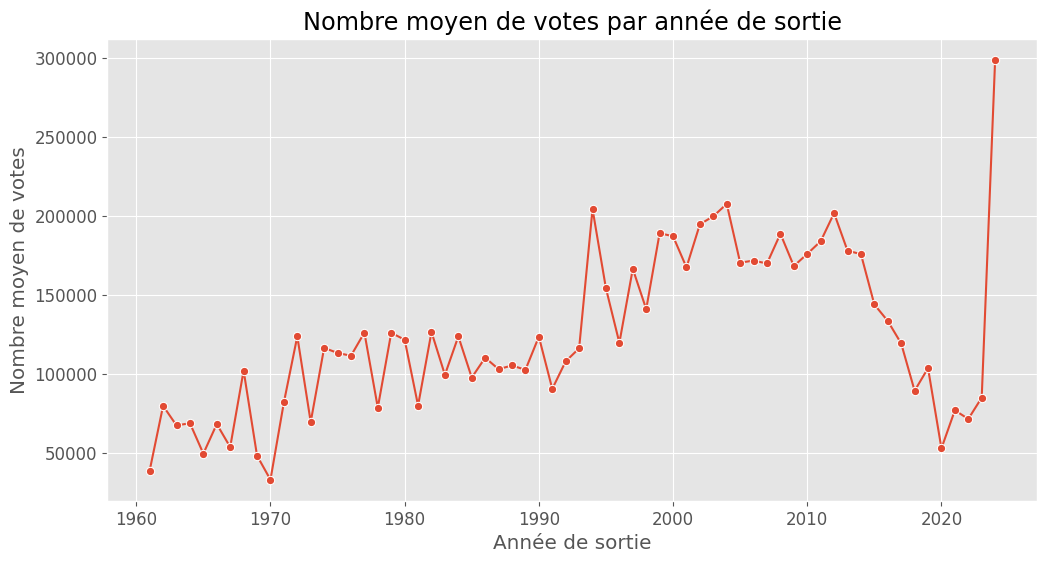

In [178]:
# 4. Votes moyens par année de sortie
votes_by_year = df_merged.groupby('startYear')['numVotes'].mean().reset_index()
votes_by_year = votes_by_year.sort_values(by='startYear')

plt.figure(figsize=(12, 6))
sns.lineplot(x='startYear', y='numVotes', data=votes_by_year, marker='o')
plt.title('Nombre moyen de votes par année de sortie')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre moyen de votes')
plt.show()

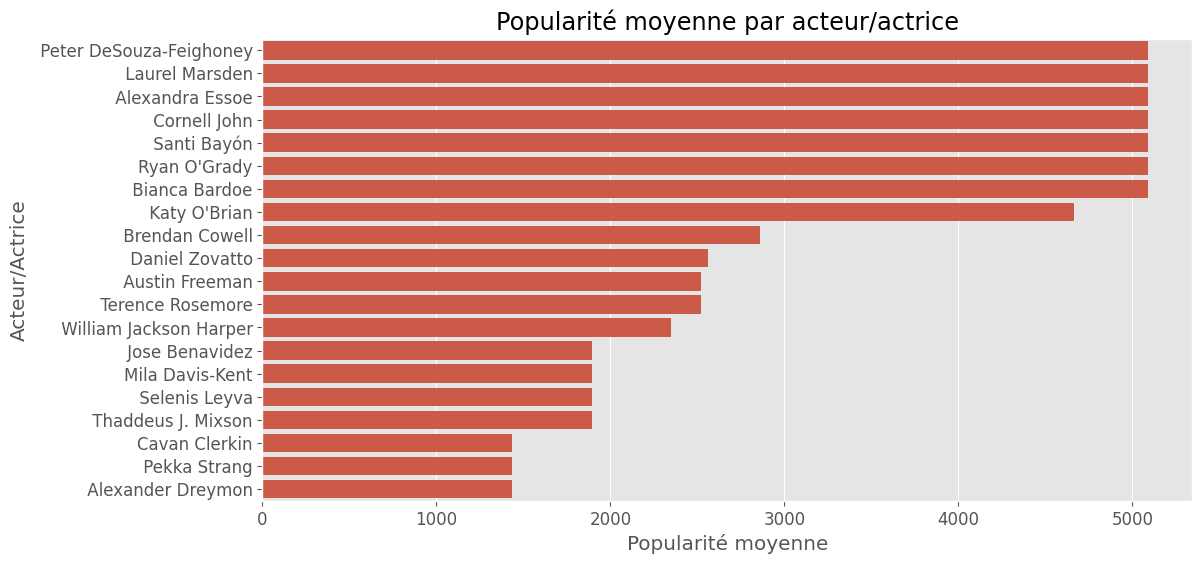

In [179]:
# 5. Popularité moyenne par acteur/actrice
popularity_by_actor = df_merged.explode('Actors_Actresses').groupby('Actors_Actresses')['popularity'].mean().reset_index()
popularity_by_actor = popularity_by_actor.sort_values(by='popularity', ascending=False).head(20)  # Afficher les 20 acteurs les plus populaires

plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='Actors_Actresses', data=popularity_by_actor)
plt.title('Popularité moyenne par acteur/actrice')
plt.xlabel('Popularité moyenne')
plt.ylabel('Acteur/Actrice')
plt.show()


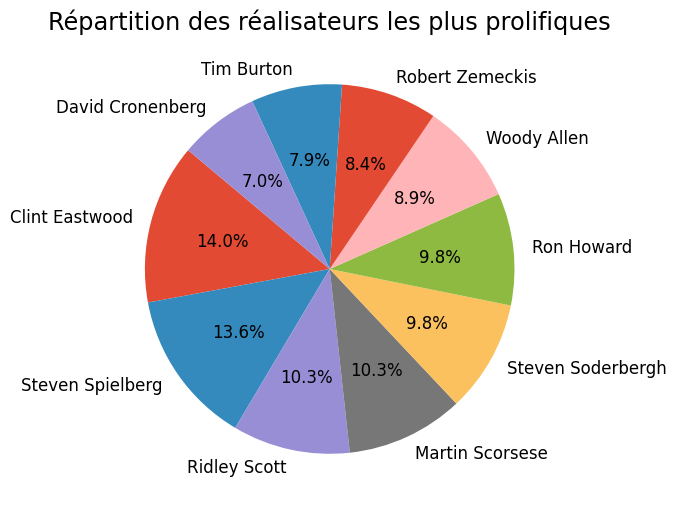

In [125]:
# Ajouter les années et leur genre de predilection dominant top 5
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [126]:
# Les acteurs et actrices les plus sollicités

# Diviser les noms des acteurs et actrices dans une liste
df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].str.split(',')

# Utiliser explode pour transformer la liste en une série avec une entrée pour chaque nom
df_actors = df_merged.explode('Actors_Actresses')

# Compter le nombre d'occurrences de chaque acteur/actrice
count_actors = df_actors['Actors_Actresses'].value_counts()

count_actors.head(10)


Actors_Actresses
Robert De Niro       52
Samuel L. Jackson    46
Morgan Freeman       40
Liam Neeson          39
Meryl Streep         39
Willem Dafoe         39
Brad Pitt            39
Tom Cruise           38
Mark Wahlberg        38
Nicolas Cage         38
Name: count, dtype: int64

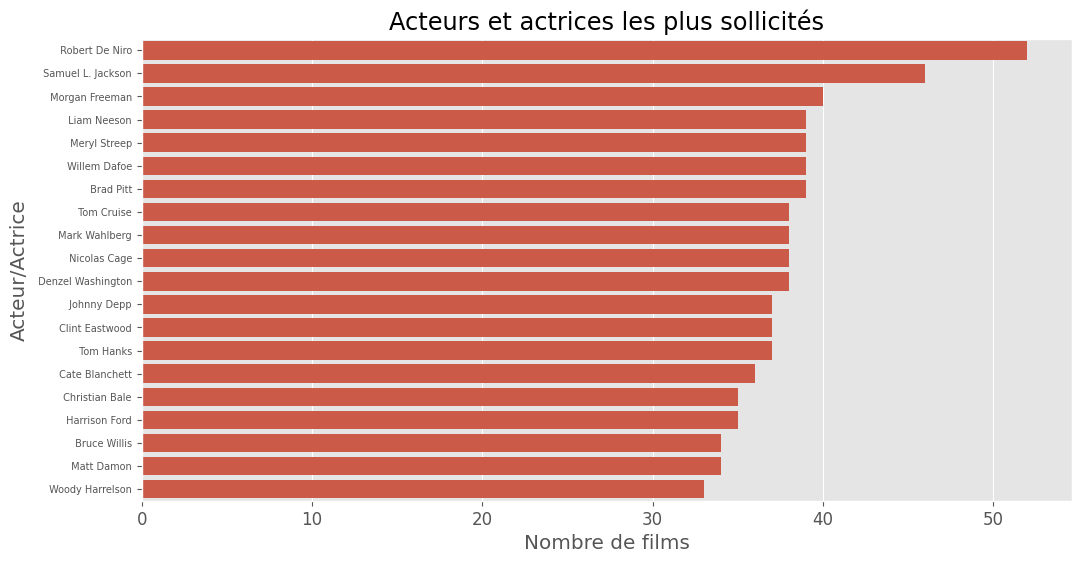

In [127]:
# Diagramme en barres pour les acteurs les plus sollicités
plt.figure(figsize=(12, 6))
sns.barplot(x=count_actors.head(20).values, y=count_actors.head(20).index)
plt.title('Acteurs et actrices les plus sollicités')
plt.xlabel('Nombre de films')
plt.ylabel('Acteur/Actrice')
plt.tick_params(axis='y', labelsize=7)
plt.show()


# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES 



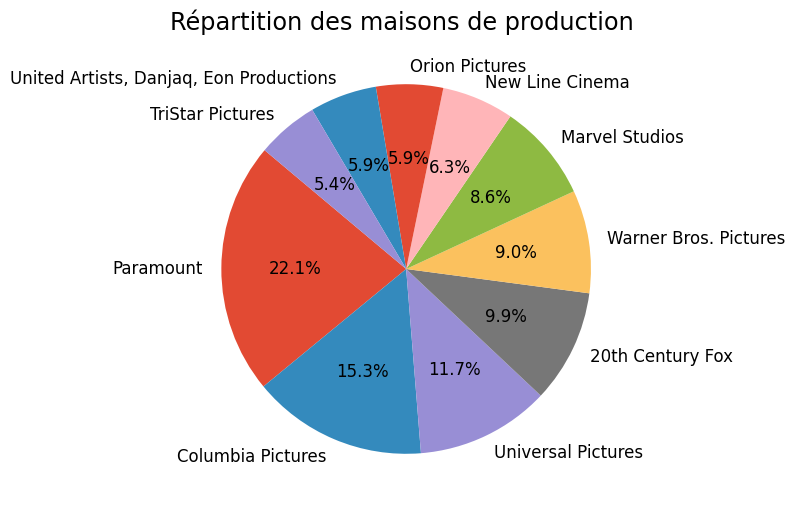

In [128]:
# Compagnies de production les plus populaires
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['production_companies_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des maisons de production ')
plt.show()


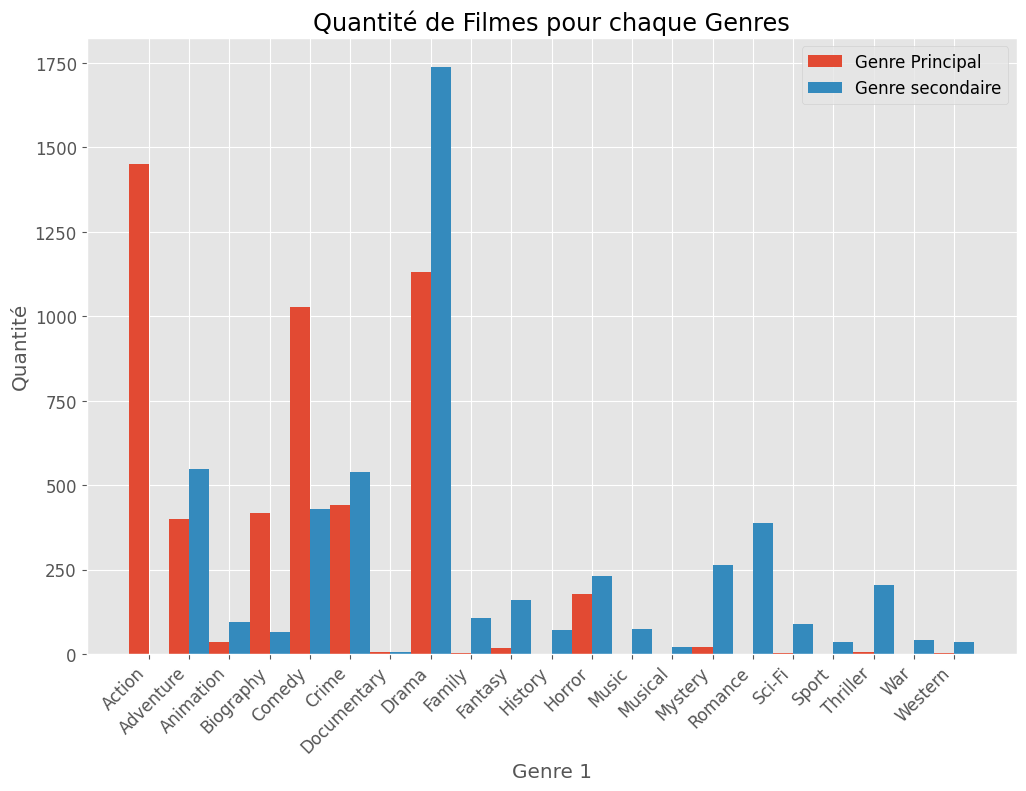

In [129]:
genero1_counts = df_merged['genre1'].value_counts()
genero2_counts = df_merged['genre2'].value_counts()

#Combinando os índices de ambas as séries para garantir que todos os gêneros estejam presentes
index = genero1_counts.index.union(genero2_counts.index)

#Preenchendo os valores ausentes com 0
genero1_counts = genero1_counts.reindex(index, fill_value=0)
genero2_counts = genero2_counts.reindex(index, fill_value=0)

#Plotando o gráfico de barras
fig, ax = plt.subplots()

#Configurando a largura das barras
bar_width = 0.5

#Calculando a posição das barras
x = range(len(index))

#Plotando as barras para Genero1
bars1 = ax.bar(x, genero1_counts.values, bar_width, label='Genre Principal')

#Plotando as barras para Genero2 com um deslocamento de bar_width
bars2 = ax.bar([i + bar_width for i in x], genero2_counts.values, bar_width, label='Genre secondaire')

#Configurando os rótulos e ticks do eixo x
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(index, rotation=45, ha='right')

#Adicionando legendas e rótulos de eixo
ax.legend()
ax.set_xlabel('Genre 1')
ax.set_ylabel('Quantité')
ax.set_title('Quantité de Filmes pour chaque Genres')

plt.show()

In [172]:
# Evolution des genres de film par décennie

df_merged['startYear'] = df_merged['startYear'].astype(int)

# Filtrer les données pour les années en décennies jusqu'en 2023
df_filtered = df_merged[df_merged['startYear'] <= 2023]

# Ajouter une colonne pour les décennies
df_filtered['decade'] = (df_filtered['startYear'] // 10) * 10

# Calculer le total par genre pour chaque décennie
df_genre_count = df_filtered.groupby(['decade', 'genre1']).size().reset_index(name='total_genre')

# Créer un bar chart avec animation par décennie
fig = px.bar(df_genre_count, 
             x='genre1', 
             y='total_genre', 
             color='genre1', 
             animation_frame='decade', 
             title='Evolution des genres de film par décennie',
             category_orders={'decade': list(range(df_genre_count['decade'].min(), 2024, 10))})

# Ajuster les limites de l'axe Y
fig.update_layout(yaxis_range=[0, df_genre_count['total_genre'].max() * 1.1])

# Réduire la vitesse de l'animation
animation_settings = {
    "frame": {"duration": 2000, "redraw": True}, # Durée de chaque frame en millisecondes
    "fromcurrent": True, 
    "transition": {"duration": 500, "easing": "quadratic-in-out"}, # Durée de la transition entre frames
}

fig.show()

C:\Users\pnii\AppData\Local\Temp\ipykernel_15620\3363441023.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
# 1. Extraire la décennie de l'année de sortie
df_merged['decade'] = (df_merged['startYear'] // 10) * 10

# 2. Exploser les acteurs/actrices dans des lignes séparées
df_exploded = df_merged.explode('Actors_Actresses')

# 3. Compter le nombre de films pour chaque acteur/actrice par décennie
actor_counts_by_decade = df_exploded.groupby(['decade', 'Actors_Actresses']).size().reset_index(name='film_count')

# 4. Identifier les 5 acteurs/actrices les plus prolifiques pour chaque décennie
top_actors_by_decade = actor_counts_by_decade.sort_values(by=['decade', 'film_count'], ascending=[True, False])
top_actors_by_decade = top_actors_by_decade.groupby('decade').head(5)

# 5. Créer un graphique à barres animé
fig = px.bar(top_actors_by_decade, 
             x='Actors_Actresses', 
             y='film_count', 
             color='Actors_Actresses', 
             animation_frame='decade', 
             range_y=[0, top_actors_by_decade['film_count'].max() + 5],
             title='Top 5 acteurs/actrices les plus prolifiques par décennie',
             labels={'film_count': 'Nombre de films', 'Actors_Actresses': 'Acteur/Actrice'},
             height=600)

fig.update_layout(xaxis={'categoryorder':'total descending'}, showlegend=False)
fig.show()
